In [1]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops

%matplotlib inline
np.random.seed(1)

In [2]:

def load_dataset(train_file, test_file):
    train_dataset = h5py.File(train_file, "r")
    train_x = np.array(train_dataset["train_set_x"][:]) 
    train_y = np.array(train_dataset["train_set_y"][:]) 

    test_dataset = h5py.File(test_file, "r")
    test_x = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_y = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_y = train_y.reshape((1, train_y.shape[0]))
    test_y = test_y.reshape((1, test_y.shape[0]))
    
    return train_x, train_y, test_x, test_y, classes


def random_mini_batches(X, Y, mini_batch_size = 64, seed = 0):
    """
    Creates a list of random minibatches from (X, Y)
    
    Arguments:
    X -- input data, of shape (input size, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    mini_batch_size - size of the mini-batches, integer
    seed -- this is only for the purpose of grading, so that you're "random minibatches are the same as ours.
    
    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """
    
    m = X.shape[1]                  # number of training examples
    mini_batches = []
    np.random.seed(seed)
    
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((Y.shape[0],m))

    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[:, k * mini_batch_size : k * mini_batch_size + mini_batch_size]
        mini_batch_Y = shuffled_Y[:, k * mini_batch_size : k * mini_batch_size + mini_batch_size]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[:, num_complete_minibatches * mini_batch_size : m]
        mini_batch_Y = shuffled_Y[:, num_complete_minibatches * mini_batch_size : m]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y



def predict(X, parameters):
    
    W1 = tf.convert_to_tensor(parameters["W1"])
    b1 = tf.convert_to_tensor(parameters["b1"])
    W2 = tf.convert_to_tensor(parameters["W2"])
    b2 = tf.convert_to_tensor(parameters["b2"])
    W3 = tf.convert_to_tensor(parameters["W3"])
    b3 = tf.convert_to_tensor(parameters["b3"])
    
    params = {"W1": W1,
              "b1": b1,
              "W2": W2,
              "b2": b2,
              "W3": W3,
              "b3": b3}
    
    x = tf.placeholder("float", [12288, 1])
    
    z3 = forward_propagation_for_predict(x, params)
    p = tf.argmax(z3)
    
    sess = tf.Session()
    prediction = sess.run(p, feed_dict = {x: X})
        
    return prediction


def forward_propagation_for_predict(X, parameters):
    """
    Implements the forward propagation for the model: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX
    
    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3"
                  the shapes are given in initialize_parameters

    Returns:
    Z3 -- the output of the last LINEAR unit
    """
    
    # Retrieve the parameters from the dictionary "parameters" 
    
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3'] 
                                                        
    Z1 = tf.add(tf.matmul(W1, X), b1)                      
    A1 = tf.nn.relu(Z1)                             
    Z2 = tf.add(tf.matmul(W2, A1), b2)                  
    A2 = tf.nn.relu(Z2)                             
    Z3 = tf.add(tf.matmul(W3, A2), b3)                     
    
    return Z3
    

In [3]:
def sigmoid(z):
    """
    Computes the sigmoid of z
    
    Arguments:
    z -- input value, scalar or vector
    
    Returns: 
    results -- the sigmoid of z
    """
    

    x = tf.placeholder(tf.float32, name= 'x')

    
    sigmoid = tf.sigmoid(x)
 
    with tf.Session() as sess:
    
        result = sess.run(sigmoid, feed_dict={x:z})
    
    
    return result

In [4]:
def cost(logits, labels):
    """
    Computes the cost using the sigmoid cross entropy
    
    Arguments:
    logits -- vector containing z, output of the last linear unit (before the final sigmoid activation)
    labels -- vector of labels y (1 or 0) 
    
    Note: What we've been calling "z" and "y" in this class are respectively called "logits" and "labels" 
    in the TensorFlow documentation. So logits will feed into z, and labels into y. 
    
    Returns:
    cost -- runs the session of the cost (formula (2))
    """
    
    
    # Create the placeholders for "logits" (z) and "labels" (y) (approx. 2 lines)
    z = tf.placeholder(tf.float32, name='z')
    y = tf.placeholder(tf.float32, name='y')
    
    # Use the loss function (approx. 1 line)
    cost = tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=z)
    
    # Create a session (approx. 1 line). See method 1 above.
    sess = tf.Session()
    
    # Run the session (approx. 1 line).
    cost = sess.run(cost, feed_dict={z:logits, y:labels})
    
    # Close the session (approx. 1 line). See method 1 above.
    sess.close()
    
    ### END CODE HERE ###
    
    return cost

In [5]:
# Loading the dataset
train_x, train_y, test_x, test_y, classes = load_dataset('train_signs.h5', 'test_signs.h5')

y = 2


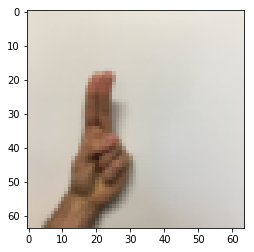

In [6]:
# Example of a picture
index = 10
plt.imshow(train_x[index])
print ("y = " + str(np.squeeze(train_y[:, index])))

In [7]:
# Flatten the training and test images
X_train_flatten = train_x.reshape(train_x.shape[0], -1).T
X_test_flatten = test_x.reshape(test_x.shape[0], -1).T
# Normalize image vectors
train_x = X_train_flatten/255.
test_x = X_test_flatten/255.
# Convert training and test labels to one hot matrices
train_y = convert_to_one_hot(train_y, 6)
test_y = convert_to_one_hot(test_y, 6)

print ("number of training examples = " + str(train_x.shape[1]))
print ("number of test examples = " + str(test_x.shape[1]))
print ("X_train shape: " + str(train_x.shape))
print ("Y_train shape: " + str(train_y.shape))
print ("X_test shape: " + str(test_x.shape))
print ("Y_test shape: " + str(test_y.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (12288, 1080)
Y_train shape: (6, 1080)
X_test shape: (12288, 120)
Y_test shape: (6, 120)


In [8]:
# GRADED FUNCTION: create_placeholders

def create_placeholders(n_x, n_y):
    """
    Creates the placeholders for the tensorflow session.

    Arguments:
    n_x -- scalar, size of an image vector (num_px * num_px = 64 * 64 * 3 = 12288)
    n_y -- scalar, number of classes (from 0 to 5, so -> 6)
    
    Returns:
    X -- placeholder for the data input, of shape [n_x, None] and dtype "float"
    Y -- placeholder for the input labels, of shape [n_y, None] and dtype "float"
    
    Tips:
    - You will use None because it let's us be flexible on the number of examples you will for the placeholders.
      In fact, the number of examples during test/train is different.
    """

  
    X = tf.placeholder(tf.float32,[n_x,None], name='X')
    Y = tf.placeholder(tf.float32,[n_y,None], name='Y')
  
    
    return X, Y

In [9]:
def initialize_parameters():
    """
    Initializes parameters to build a neural network with tensorflow. The shapes are:
                        W1 : [25, 12288]
                        b1 : [25, 1]
                        W2 : [12, 25]
                        b2 : [12, 1]
                        W3 : [6, 12]
                        b3 : [6, 1]
    
    Returns:
    parameters -- a dictionary of tensors containing W1, b1, W2, b2, W3, b3
    """
    
    tf.set_random_seed(1)                   
        
   
    W1 = tf.get_variable('W1', [25,12288], initializer=tf.contrib.layers.xavier_initializer(seed=1))
    b1 = tf.get_variable('b1', [25,1], initializer=tf.zeros_initializer())
    W2 = tf.get_variable('W2', [12,25], initializer=tf.contrib.layers.xavier_initializer(seed=1))
    b2 = tf.get_variable('b2', [12,1], initializer=tf.zeros_initializer())
    W3 = tf.get_variable('W3', [6,12], initializer=tf.contrib.layers.xavier_initializer(seed=1))
    b3 = tf.get_variable('b3', [6,1], initializer=tf.zeros_initializer())
    

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    
    return parameters

In [10]:

def forward_propagation(X, parameters):
    """
    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3"
                  the shapes are given in initialize_parameters

    Returns:
    Z3 -- the output of the last LINEAR unit
    """
    
    # Retrieve the parameters from the dictionary "parameters" 
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    
    Z1 = tf.add(tf.matmul(W1,X),b1)                                          
    A1 = tf.nn.relu(Z1)                                              
    Z2 = tf.add(tf.matmul(W2,A1),b2)                                              
    A2 = tf.nn.relu(Z2)                                              
    Z3 = tf.add(tf.matmul(W3,A2),b3)                                            
  
    
    return Z3

In [50]:
def compute_cost(Z3, Y,parameters):
    """
    Computes the cost
    
    Arguments:
    Z3 -- output of forward propagation (output of the last LINEAR unit), of shape (6, number of examples)
    Y -- "true" labels vector placeholder, same shape as Z3
    
    Returns:
    cost - Tensor of the cost function
    """
    
   
    logits = tf.transpose(Z3)
    labels = tf.transpose(Y)
    
 
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=labels))

    
    return cost

In [51]:
def model(train_x, train_y, test_x, test_y, learning_rate = 0.0001,
          num_epochs = 1500, minibatch_size = 32, print_cost = True):
    """
    Implements a three-laer tensorflow neural network: LINEAR->RELU->LINEAR->5ELU->LINEAR->SOFTMAX.
    
    Arguments:
    X_train -- training set, of shape (input size = 12288, number of training examples = 1080)
    Y_train -- test set, of shape (output size = 6, number of training examples = 1080)
    X_test -- training set, of shape (input size = 12288, number of training examples = 120)
    Y_test -- test set, of shape (output size = 6, number of test examples = 120)
    learning_rate -- learning rate of the optimization
    num_epochs -- number of epochs of the optimization loop
    minibatch_size -- size of a minibatch
    print_cost -- True to print the cost every 100 epochs
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
    tf.set_random_seed(1)                             # to keep consistent results
    seed = 3                                          # to keep consistent results
    (n_x, m) = train_x.shape                          # (n_x: input size, m : number of examples in the train set)
    n_y = train_y.shape[0]                            # n_y : output size
    costs = []                                        # To keep track of the cost
    
    
    X, Y = create_placeholders(n_x,n_y)

    # Initialize parameters

    parameters = initialize_parameters()

    
    # Forward propagation: Build the forward propagation in the tensorflow graph
    
    Z3 = forward_propagation(X, parameters)
    
    
    # Cost function: Add cost function to tensorflow graph
    
    cost = compute_cost(Z3,Y,parameters)
    

    # Backpropagation: Define the tensorflow optimizer. Use an AdamOptimizer.

    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    
    
    # Initialize all the variables
    
    init = tf.global_variables_initializer()

    # Start the session to compute the tensorflow graph
    
    with tf.Session() as sess:
        
        # Run the initialization
        sess.run(init)
        
        # Do the training loop
        for epoch in range(num_epochs):

            epoch_cost = 0.                       
            num_minibatches = int(m / minibatch_size) # number of minibatches of size minibatch_size in the train set
            seed = seed + 1
            minibatches = random_mini_batches(train_x,train_y, minibatch_size, seed)

            for minibatch in minibatches:

                # Select a minibatch
                
                (minibatch_X, minibatch_Y) = minibatch
                
                # IMPORTANT: The line that runs the graph on a minibatch.
                # Run the session to execute the "optimizer" and the "cost", the feedict should contain a minibatch for (X,Y).
               
                _ , minibatch_cost = sess.run([optimizer,cost], feed_dict={X: minibatch_X, Y: minibatch_Y})
              
                epoch_cost += minibatch_cost / num_minibatches

            # Print the cost every epoch
            if print_cost == True and epoch % 100 == 0:
                print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
            if print_cost == True and epoch % 5 == 0:
                costs.append(epoch_cost)
                
        # plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        # save the parameters in a variable
        parameters = sess.run(parameters)
        print ("Parameters have been trained!")

        # Calculate the correct predictions
        correct_prediction = tf.equal(tf.argmax(Z3), tf.argmax(Y))

        # Calculate accuracy on the test set
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

        print ("Train Accuracy:", accuracy.eval({X: train_x, Y: train_y}))
        print ("Test Accuracy:", accuracy.eval({X: test_x, Y: test_y}))
        
        return parameters,accuracy.eval({X: train_x, Y: train_y}),accuracy.eval({X: test_x, Y: test_y})

Cost after epoch 0: 1.855702
Cost after epoch 100: 1.016411
Cost after epoch 200: 0.733256
Cost after epoch 300: 0.572957
Cost after epoch 400: 0.468875
Cost after epoch 500: 0.381083
Cost after epoch 600: 0.313972
Cost after epoch 700: 0.254411
Cost after epoch 800: 0.203953
Cost after epoch 900: 0.166660
Cost after epoch 1000: 0.142506
Cost after epoch 1100: 0.107757
Cost after epoch 1200: 0.086087
Cost after epoch 1300: 0.060919
Cost after epoch 1400: 0.051012


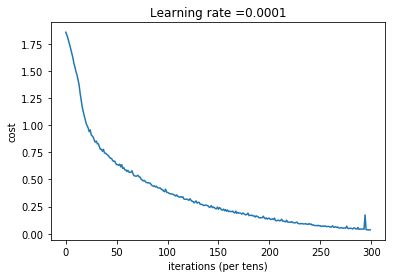

Parameters have been trained!
Train Accuracy: 0.9990741
Test Accuracy: 0.725


In [53]:
parameters,train_acc, test_acc  = model(train_x, train_y, test_x, test_y,num_epochs = 1500, minibatch_size =32, print_cost = True)

##### From the above results we easily conclude that our model has high variance so below is the some variance reduction techniques are performed which helps in reducing the variance of the model as well increasing the accuracy of the test set. 



### Model variance reduction techniques 

1. Early stopping
       Reduces the number of epoch from 1500 to 500

2. L2 Regularization 

In [54]:
def compute_cost_with_regularization(Z3, Y,parameters,beta):
    """
    Computes the cost
    
    Arguments:
    Z3 -- output of forward propagation (output of the last LINEAR unit), of shape (6, number of examples)
    Y -- "true" labels vector placeholder, same shape as Z3
    
    Returns:
    cost - Tensor of the cost function
    """
    
   
    logits = tf.transpose(Z3)
    labels = tf.transpose(Y)
    
 
    nor_loss = (tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=labels)))
    reg=tf.nn.l2_loss(parameters['W1']) + tf.nn.l2_loss(parameters['W2'])+tf.nn.l2_loss(parameters['W3'])                       
    cost=tf.reduce_mean(nor_loss+ beta*reg)
    
    return cost

In [55]:
def model(train_x, train_y, test_x, test_y, learning_rate = 0.0001,
          num_epochs = 1500, minibatch_size = 32, print_cost = True,beta=0.01):
    """
    Implements a three-laer tensorflow neural network: LINEAR->RELU->LINEAR->5ELU->LINEAR->SOFTMAX.
    
    Arguments:
    X_train -- training set, of shape (input size = 12288, number of training examples = 1080)
    Y_train -- test set, of shape (output size = 6, number of training examples = 1080)
    X_test -- training set, of shape (input size = 12288, number of training examples = 120)
    Y_test -- test set, of shape (output size = 6, number of test examples = 120)
    learning_rate -- learning rate of the optimization
    num_epochs -- number of epochs of the optimization loop
    minibatch_size -- size of a minibatch
    print_cost -- True to print the cost every 100 epochs
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
    tf.set_random_seed(1)                             # to keep consistent results
    seed = 3                                          # to keep consistent results
    (n_x, m) = train_x.shape                          # (n_x: input size, m : number of examples in the train set)
    n_y = train_y.shape[0]                            # n_y : output size
    costs = []                                        # To keep track of the cost
    
    
    X, Y = create_placeholders(n_x,n_y)

    # Initialize parameters

    parameters = initialize_parameters()

    
    # Forward propagation: Build the forward propagation in the tensorflow graph
    
    Z3 = forward_propagation(X, parameters)
    
    
    # Cost function: Add cost function to tensorflow graph
    
    cost = compute_cost_with_regularization(Z3,Y,parameters,beta)
    

    # Backpropagation: Define the tensorflow optimizer. Use an AdamOptimizer.

    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    
    
    # Initialize all the variables
    
    init = tf.global_variables_initializer()

    # Start the session to compute the tensorflow graph
    
    with tf.Session() as sess:
        
        # Run the initialization
        sess.run(init)
        
        # Do the training loop
        for epoch in range(num_epochs):

            epoch_cost = 0.                       
            num_minibatches = int(m / minibatch_size) # number of minibatches of size minibatch_size in the train set
            seed = seed + 1
            minibatches = random_mini_batches(train_x,train_y, minibatch_size, seed)

            for minibatch in minibatches:

                # Select a minibatch
                
                (minibatch_X, minibatch_Y) = minibatch
                
                # IMPORTANT: The line that runs the graph on a minibatch.
                # Run the session to execute the "optimizer" and the "cost", the feedict should contain a minibatch for (X,Y).
               
                _ , minibatch_cost = sess.run([optimizer,cost], feed_dict={X: minibatch_X, Y: minibatch_Y})
              
                epoch_cost += minibatch_cost / num_minibatches

            # Print the cost every epoch
            if print_cost == True and epoch % 100 == 0:
                print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
            if print_cost == True and epoch % 5 == 0:
                costs.append(epoch_cost)
                
        # plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        # save the parameters in a variable
        parameters = sess.run(parameters)
        print ("Parameters have been trained!")

        # Calculate the correct predictions
        correct_prediction = tf.equal(tf.argmax(Z3), tf.argmax(Y))

        # Calculate accuracy on the test set
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

        print ("Train Accuracy:", accuracy.eval({X: train_x, Y: train_y}))
        print ("Test Accuracy:", accuracy.eval({X: test_x, Y: test_y}))
        
        return parameters,accuracy.eval({X: train_x, Y: train_y}),accuracy.eval({X: test_x, Y: test_y})

Cost after epoch 0: 1.903214
Cost after epoch 100: 1.159149
Cost after epoch 200: 0.797063
Cost after epoch 300: 0.557131
Cost after epoch 400: 0.395691


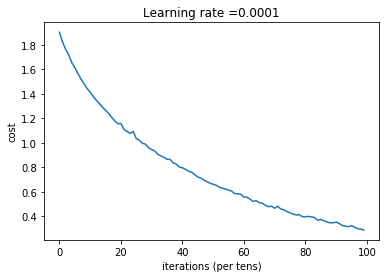

Parameters have been trained!
Train Accuracy: 0.9398148
Test Accuracy: 0.875
0.9398148 0.875


In [56]:
parameters,train_acc, test_acc  = model(train_x, train_y, test_x, test_y,num_epochs = 500, minibatch_size =64, print_cost = True,beta=0.0001002280743588889)
print(train_acc, test_acc)

#### As we can see above by applying the variance reduction technique we reduce the variance of the model from 28 percent to 6 percent